# Introduction to Geopandas

Geopandas is an extension of the Pandas library to handle spatial data formats. It is not a replacement for a full GIS suite, but it is good for exploration of the data.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Geopandas uses `shapely` and `fiona` in the background. `fiona` handles IO, while `shapely` is important for handling geometries.

In [2]:
import shapely
import fiona

In [3]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In addition, it is easy to convert files from a pandas DataFrame into a Geopandas GeoDataFrame, provided that the data is available to make a geometry column. We will load a csv with pandas and turn it into a GeoDataFrame.

In [4]:
df = pd.read_csv('https://geocomp.s3.amazonaws.com/data/Panoma_well_headers.csv')
df

,NAME,LEASE,WELL,API_NUMBER,LATITUDE,LONGITUDE
0,SHRIMPLIN,Shrimplin Gas Unit,2HI,15-055-21045,37.978076,-100.987305
1,NOLAN,Nolan,4-16,15-055-20824,37.781202,-101.047447
2,SHANKLE,Shankle,2-9,15-093-21250,38.063373,-101.389189
3,LUKE G U,Luke Gas Unit,4,15-187-20661,37.449961,-101.612191
4,NEWBY,Newby,1,15-189-10106,37.325960,-101.325130
5,KIMZEY,Kimzey,1,15-189-00588,37.105629,-101.312229
6,ALEXANDER,Alexander 'D',2,15-067-20338,37.674726,-101.167526
7,CHURCHMAN BIBLE,Churchman Bible,2,15-189-20982,37.356426,-101.106045
8,CROSS H CATTLE,Cross H Cattle Co,1-6,15-075-20543,37.910583,-101.646452
9,STUART,Stuart,5-27,15-067-20856,37.500380,-101.129860


In order to make the GeoDataFrame, we need to add the geometry. This needs to be a `shapely` geometry of some kind:

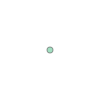

In [5]:
shapely.geometry.Point(df.loc[0, 'LONGITUDE'], df.loc[0, 'LATITUDE'])

In [6]:
def make_point(row):
    '''Make a point from LATITUDE and LONGITUDE in a row.'''
    return shapely.geometry.Point(row['LONGITUDE'], row['LATITUDE'])

In [7]:
df['geometry'] = df.apply(make_point, axis=1)

In [8]:
gdf = gpd.GeoDataFrame(df)
gdf

,NAME,LEASE,WELL,API_NUMBER,LATITUDE,LONGITUDE,geometry
0,SHRIMPLIN,Shrimplin Gas Unit,2HI,15-055-21045,37.978076,-100.987305,POINT (-100.98731 37.97808)
1,NOLAN,Nolan,4-16,15-055-20824,37.781202,-101.047447,POINT (-101.04745 37.78120)
2,SHANKLE,Shankle,2-9,15-093-21250,38.063373,-101.389189,POINT (-101.38919 38.06337)
3,LUKE G U,Luke Gas Unit,4,15-187-20661,37.449961,-101.612191,POINT (-101.61219 37.44996)
4,NEWBY,Newby,1,15-189-10106,37.325960,-101.325130,POINT (-101.32513 37.32596)
5,KIMZEY,Kimzey,1,15-189-00588,37.105629,-101.312229,POINT (-101.31223 37.10563)
6,ALEXANDER,Alexander 'D',2,15-067-20338,37.674726,-101.167526,POINT (-101.16753 37.67473)
7,CHURCHMAN BIBLE,Churchman Bible,2,15-189-20982,37.356426,-101.106045,POINT (-101.10605 37.35643)
8,CROSS H CATTLE,Cross H Cattle Co,1-6,15-075-20543,37.910583,-101.646452,POINT (-101.64645 37.91058)
9,STUART,Stuart,5-27,15-067-20856,37.500380,-101.129860,POINT (-101.12986 37.50038)


<AxesSubplot:>

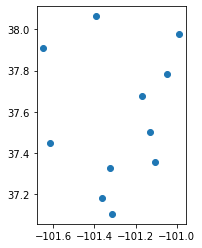

In [9]:
gdf.plot()

## Reprojecting our data

Once we have a GeoDataFrame, we can start doing some fun things with our data, such as reprojecting it. We can do this automatically when importing a geospatial format, but since we loaded it as a CSV, we first need to set the Coordinate Reference System (CRS), which we can do in a few ways. The easiest is to use an EPSG code. Given that our data is in decimal degrees, we will use a geodetic projection, of which the most common is WGS84. WGS84 has an EPSG code of 4326.

In [10]:
gdf.crs

In [11]:
gdf.crs = 'EPSG:4326'
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We may want to convert this to a UTM projection. In this case we will be using NAD83 for UTM Zone 14N:

In [12]:
gdf.to_crs(epsg=6344).geometry

0     POINT (-202025.122 4233604.505)
1     POINT (-209220.368 4212167.437)
2     POINT (-236545.131 4246225.822)
3     POINT (-262487.924 4179785.672)
4     POINT (-238251.504 4163685.509)
5     POINT (-239271.456 4139072.194)
6     POINT (-220860.722 4201249.432)
7     POINT (-218496.319 4165370.333)
8     POINT (-260763.111 4231316.448)
9     POINT (-219220.610 4181565.659)
10    POINT (-242899.686 4147814.024)
Name: geometry, dtype: geometry

In [13]:
gdf = gdf.to_crs(epsg=6344)
gdf.crs

<Projected CRS: EPSG:6344>
Name: NAD83(2011) / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: USA - 96°W to 90°W
- bounds: (-96.01, 25.61, -90.0, 49.38)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

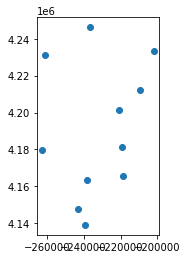

In [14]:
gdf.plot()

## Selection by coordinates

We may want to take a subset of data based on the coordinates, using the `.cx` property.

In [15]:
gdf.cx[:-210000, 4180000:]

,NAME,LEASE,WELL,API_NUMBER,LATITUDE,LONGITUDE,geometry
2,SHANKLE,Shankle,2-9,15-093-21250,38.063373,-101.389189,POINT (-236545.131 4246225.822)
6,ALEXANDER,Alexander 'D',2,15-067-20338,37.674726,-101.167526,POINT (-220860.722 4201249.432)
8,CROSS H CATTLE,Cross H Cattle Co,1-6,15-075-20543,37.910583,-101.646452,POINT (-260763.111 4231316.448)
9,STUART,Stuart,5-27,15-067-20856,37.500380,-101.129860,POINT (-219220.610 4181565.659)


<AxesSubplot:>

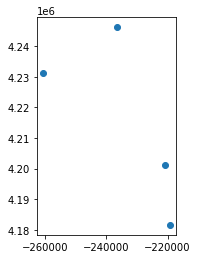

In [16]:
gdf.cx[:-210000, 4180000:].plot()

## More plotting options

The plotting functionality is varied, and a fair number of options exist to do interesting things:

<AxesSubplot:>

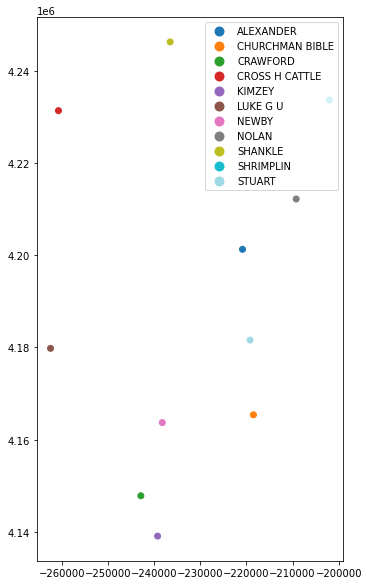

In [17]:
# Categorical data
gdf.plot(column='NAME', legend=True, figsize=(8,10), cmap='tab20')

<AxesSubplot:>

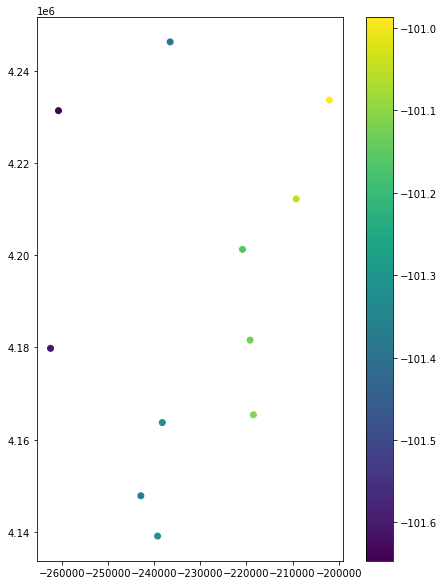

In [18]:
# Sequential data, although this gdf does not actually have a good candidate for such.
gdf.plot(column='LONGITUDE', legend=True, figsize=(8,10))

<AxesSubplot:>

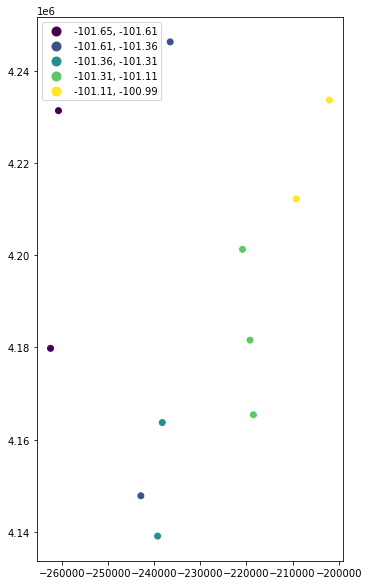

In [20]:
# binned sequential data
gdf.plot(column='LONGITUDE', legend=True, figsize=(8,10), scheme='NaturalBreaks')

Multiply thickness by porosity and plot it?

## Attribute Joins

If we want to combine spatial and non-spatial data, then we need to have an attirbute to join. This works similarly to a normal join, but we want to ensure that we have a `geometry` column after we are done.

In [ ]:
gdf.buffer(10000)

In [ ]:
gdf.buffer(10000).plot()

In [ ]:
gdf.buffer(10000)